In [458]:
import numpy as np
import matplotlib.pyplot as plt

In [459]:
# RECUPERER LES FICHIERS CSV DANS MON DRIVE
import os
from google.colab import drive,files
drive.mount('/content/gdrive')
!ls /content

DRIVE_LEDOSSIER = "/content/gdrive/MyDrive/Zone de Code Python/• Mes logiciels Hack/• Battery Stat/backups"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [460]:
import pandas as pd

#retourner tous les fichiers csv
def LesFichiers():
    res = [DRIVE_LEDOSSIER + "/" + fic for fic in os.listdir(DRIVE_LEDOSSIER)] 
    return sorted(res)

# Fusionner en un seul data frame toutes ces données
def FusionFichiersCSV(listefichierCSV):
    listeObs = []
    for fic in listefichierCSV:
        obs = pd.read_csv(fic,sep =";",index_col='datetime',parse_dates=True)
        #print(obs)
        listeObs.append(obs)
    res = pd.concat(listeObs)
    return res

Data = FusionFichiersCSV(LesFichiers())

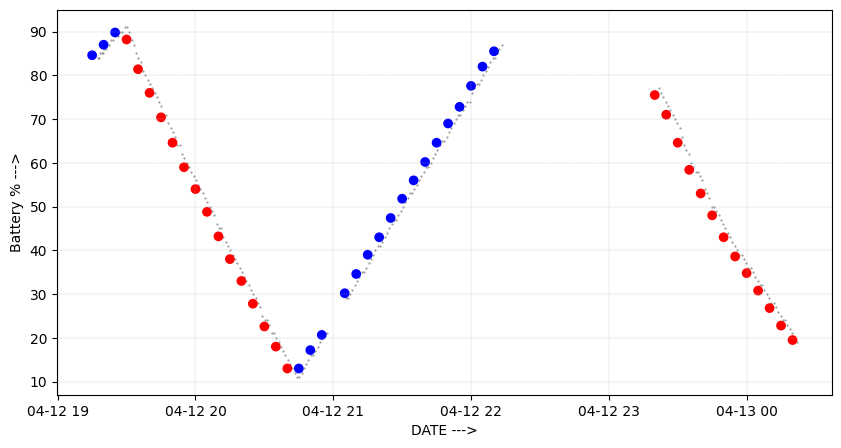

In [478]:
#@title Graph Batterie Mlamali  { display-mode: "form" ,  run: "auto" }
figure_size = (10,5)   #@param {type : "raw" }
plt.figure(figsize=figure_size)
interval_min = "2021-04-12 19:15" #@param {type:"string"}
interval_max = "2021-04-13 00:30" #@param {type:"string"}
aff_moyparmin = True #@param {type:"boolean"}

moyParMin =  5 #@param {type:"slider", min:5, max:15, step:1}

if moyParMin < 3:
    moyParMin = 3


def AfficherGraphe(Data):
    global interval_min, interval_max

    plt
    plt.grid(linestyle = '--', linewidth = 0.25)
    plt.ylabel('Battery % --->')
    plt.xlabel('DATE --->')
    Zone_Data = Data[interval_min:interval_max]
    
    plt.scatter(Zone_Data.index,Zone_Data["%"],c='grey', s=0.2 )

    Zone_SAMPLED = Zone_Data.resample(str(moyParMin) + 'min').mean()
    col = np.where(np.array( Zone_SAMPLED['plugged']) ==1,'b','r')
    plt.scatter(Zone_SAMPLED.index,Zone_SAMPLED["%"],c=col)

    plt.show()


AfficherGraphe(Data)